In [1]:
cd ../related_post_gen/python

/Users/fizmat/Desktop/related_post_gen/python


In [2]:
from sh import git, python
from glob import iglob
import pandas as pd
from io import StringIO
from tqdm.notebook import tqdm

In [16]:
print(python("--version"))

Python 3.10.12



In [4]:
def k_input_columns(k):
    assert k in {5, 6}
    columns = ["counter", "import", "compile", "input", "process", "output"]
    if k == 5:
        return columns[:2] + columns[3:]
    return columns

In [5]:
TIME_COLUMNS = ["import", "input", "process", "output"]

In [6]:
COMMIT_MAP = {
    "python~6..python~3": ["related.py"],
    "python~5..test-partition": ["related_np.py"],
    "python..scipy-partition": ["related_scipy.py"],
    "python..dataframes~1": ["related_pd.py"],
    "dataframes~1..dataframes": ["related_pl.py"],
    "python..numba": ["related_numba.py"],
}

In [7]:
N = 5

In [8]:
def collect_times(commit_range, glob, n=N):
    data = []
    for i, h in enumerate(git("rev-list", "--reverse", commit_range, "--", _tty_out=False).splitlines()):
        print(git.checkout(h))
        subj = git.show("-s", "--format=%s", _tty_out=False).strip()
        subj = f"{i}: {subj:.20}…"
        print(subj)
        for f in iglob(glob):
            if "duckdb" in f:
                continue
            print(f)
            # warm-up
            print(python(f))
            print(python(f, _env={"DETAILED_PYTHON_PERF": "1"}))
            # measure
            buf = "\n".join(python(f, _tty_out=False, _env={"DETAILED_PYTHON_PERF": "1"}).strip() 
                            for _ in tqdm(range(n)))
            record = pd.read_csv(StringIO(buf), sep="\t", header=None)
            record.columns = k_input_columns(len(record.columns))
            record["total"] = record.iloc[:, 1:].sum(axis=1)
            record.insert(0, "impl", f)
            record.insert(1, "commit", subj)
            data.append(record)
    return pd.concat(data)


In [9]:
times = pd.concat(collect_times(commit_range, g) for commit_range, globs in COMMIT_MAP.items() for g in globs) 


0: install all python d…
related.py
Processing time (w/o IO): 1.363s

perf_counter	0.004165166	0.003753042	1.359936333	0.128554459
process_time	0.004165	0.003752	1.359872	0.127357



  0%|          | 0/5 [00:00<?, ?it/s]


1: minor pythonizations…
related.py
Processing time (w/o IO): 1.558s

perf_counter	0.004179959	0.00378025	1.517073083	0.134395625
process_time	0.004002	0.00378	1.515798	0.129262



  0%|          | 0/5 [00:00<?, ?it/s]


2: use ujson for IO…
related.py
Processing time (w/o IO): 1.509s

perf_counter	0.002901542	0.003518625	1.506500458	0.018658167
process_time	0.002901	0.003519	1.504321	0.017135



  0%|          | 0/5 [00:00<?, ?it/s]


0: minor pythonizations…
related_np.py
Processing time (w/o IO): 0.562s

perf_counter	0.045018791	0.004041167	0.540309958	0.132154959
process_time	0.045154	0.00404	0.536081	0.129103



  0%|          | 0/5 [00:00<?, ?it/s]


1: use ujson for IO…
related_np.py
Processing time (w/o IO): 0.535s

perf_counter	0.049443625	0.00355525	0.531331541	0.027014792
process_time	0.048126	0.003556	0.53132	0.017904



  0%|          | 0/5 [00:00<?, ?it/s]


2: np: use python set t…
related_np.py
Processing time (w/o IO): 0.520s

perf_counter	0.046834125	0.003608125	0.5165295	0.01782675
process_time	0.046946	0.003608	0.516278	0.017773



  0%|          | 0/5 [00:00<?, ?it/s]


3: np: use smaller matr…
related_np.py
Processing time (w/o IO): 0.495s

perf_counter	0.046693542	0.003532458	0.494495958	0.0173975
process_time	0.046855	0.003532	0.494484	0.017397



  0%|          | 0/5 [00:00<?, ?it/s]


4: use dict of tags to …
related_np.py
Processing time (w/o IO): 0.481s

perf_counter	0.046796084	0.003518958	0.47490675	0.018727458
process_time	0.046919	0.003518	0.474878	0.017719



  0%|          | 0/5 [00:00<?, ?it/s]


5: try to use numpy par…
related_np.py
Processing time (w/o IO): 0.519s

perf_counter	0.047987459	0.003762666	0.543809709	0.018286541
process_time	0.048096	0.00376	0.534617	0.018275



  0%|          | 0/5 [00:00<?, ?it/s]


0: copy numpy matrix so…
related_scipy.py
Processing time (w/o IO): 0.483s

perf_counter	0.0469285	0.003536584	0.471950333	0.017024125
process_time	0.046973	0.003537	0.471263	0.017024



  0%|          | 0/5 [00:00<?, ?it/s]


1: use scipy sparse mat…
related_scipy.py
Processing time (w/o IO): 0.284s

perf_counter	0.087964875	0.003562334	0.284917125	0.019902583
process_time	0.078889	0.00356	0.281731	0.017302



  0%|          | 0/5 [00:00<?, ?it/s]


2: sort results directl…
related_scipy.py
Processing time (w/o IO): 0.225s

perf_counter	0.077320084	0.003553083	0.22596575	0.017152708
process_time	0.077366	0.003552	0.225921	0.016877



  0%|          | 0/5 [00:00<?, ?it/s]


3: try to use numpy par…
related_scipy.py
Processing time (w/o IO): 0.226s

perf_counter	0.076552875	0.003531917	0.22222	0.018181083
process_time	0.076665	0.003528	0.222162	0.017066



  0%|          | 0/5 [00:00<?, ?it/s]


0: add python pandas va…
related_pd.py
Processing time (w/o IO): 5.464s

perf_counter	0.209889791	0.008017792	5.426921042	0.024881833
process_time	0.170241	0.008017	5.04888	0.023816



  0%|          | 0/5 [00:00<?, ?it/s]


0: add python polars va…
related_pl.py
Processing time (w/o IO): 1.370s

perf_counter	0.054244125	0.0025705	1.384343417	0.009139041
process_time	0.053183	0.002559	4.71185	0.008996



  0%|          | 0/5 [00:00<?, ?it/s]


0: add another numpy so…
related_numba.py
Processing time (w/o IO): 0.895s

perf_counter	0.046667917	5.875e-06	0.003509208	0.904562458	0.017398417
process_time	0.046819	2e-06	0.003509	0.901599	0.017397



  0%|          | 0/5 [00:00<?, ?it/s]


1: accelerate with numb…
related_numba.py
Processing time (w/o IO): 0.171s

perf_counter	0.148606167	0.224825667	0.003671333	0.170207708	0.017369834
process_time	0.148658	0.224569	0.00367	0.170208	0.017197



  0%|          | 0/5 [00:00<?, ?it/s]

In [10]:
times.insert(4, "compile", times.pop("compile").fillna(0))

In [11]:
times.commit = times.commit.str.slice(0, 20)+"…"

In [12]:
from uncertainties import ufloat

def pretty_stddev(df: pd.DataFrame):
    return (1000 * df).apply(lambda c: f"{ufloat(c.mean(), c.std()):.2ufP}")

table = times.groupby(["impl", "counter", "commit"]).apply(pretty_stddev)
table

import  \
impl             counter      commit                               
related.py       perf_counter 0: install all pytho…    4.54±0.32   
                              1: minor pythonizati…      4.6±1.1   
                              2: use ujson for IO……    2.98±0.14   
                 process_time 0: install all pytho…    4.47±0.25   
                              1: minor pythonizati…    4.23±0.32   
                              2: use ujson for IO……    2.98±0.14   
related_np.py    perf_counter 0: minor pythonizati…     46.1±1.1   
                              1: use ujson for IO……   47.09±0.34   
                              2: np: use python se…   47.43±0.95   
                              3: np: use smaller m…     48.7±1.2   
                              4: use dict of tags …     47.9±2.1   
                              5: try to use numpy …     47.8±2.0   
                 process_time 0: minor pythonizati…     46.2±1.1   
                              1: use ujson for IO……   47.21±0.33   
                              2: np: use python se…   47.25±0.73   
                              3: np: use smaller m…   48.11±0.77   
                              4: use dict of tags …     47.5±1.0   
                              5: try to use numpy …     47.6±1.3   
related_numba.py perf_counter 0: add another numpy…     48.7±1.6   
                              1: accelerate with n…    149.8±2.7   
                 process_time 0: add another numpy…     48.8±1.4   
                              1: accelerate with n…    149.8±2.7   
related_pd.py    perf_counter 0: add python pandas…    215.0±5.1   
                 process_time 0: add python pandas…  172.12±0.82   
related_pl.py    perf_counter 0: add python polars…     50.0±3.7   
                 process_time 0: add python polars…     49.1±3.6   
related_scipy.py perf_counter 0: copy numpy matrix…   47.52±0.88   
                              1: use scipy sparse …     81.6±5.2   
                              2: sort results dire…     78.2±1.2   
                              3: try to use numpy …     78.1±1.1   
                 process_time 0: copy numpy matrix…   47.32±0.58   
                              1: use scipy sparse …     79.4±2.9   
                              2: sort results dire…   77.99±0.84   
                              3: try to use numpy …     78.2±1.1   

                                                             compile  \
impl             counter      commit                                   
related.py       perf_counter 0: install all pytho…           0.00±0   
                              1: minor pythonizati…           0.00±0   
                              2: use ujson for IO……           0.00±0   
                 process_time 0: install all pytho…           0.00±0   
                              1: minor pythonizati…           0.00±0   
                              2: use ujson for IO……           0.00±0   
related_np.py    perf_counter 0: minor pythonizati…           0.00±0   
                              1: use ujson for IO……           0.00±0   
                              2: np: use python se…           0.00±0   
                              3: np: use smaller m…           0.00±0   
                              4: use dict of tags …           0.00±0   
                              5: try to use numpy …           0.00±0   
                 process_time 0: minor pythonizati…           0.00±0   
                              1: use ujson for IO……           0.00±0   
                              2: np: use python se…           0.00±0   
                              3: np: use smaller m…           0.00±0   
                              4: use dict of tags …           0.00±0   
                              5: try to use numpy …           0.00±0   
related_numba.py perf_counter 0: add another numpy…  0.00330±0.00030   
                              1: accelerate with n…        223.6±2.8   
                 process_

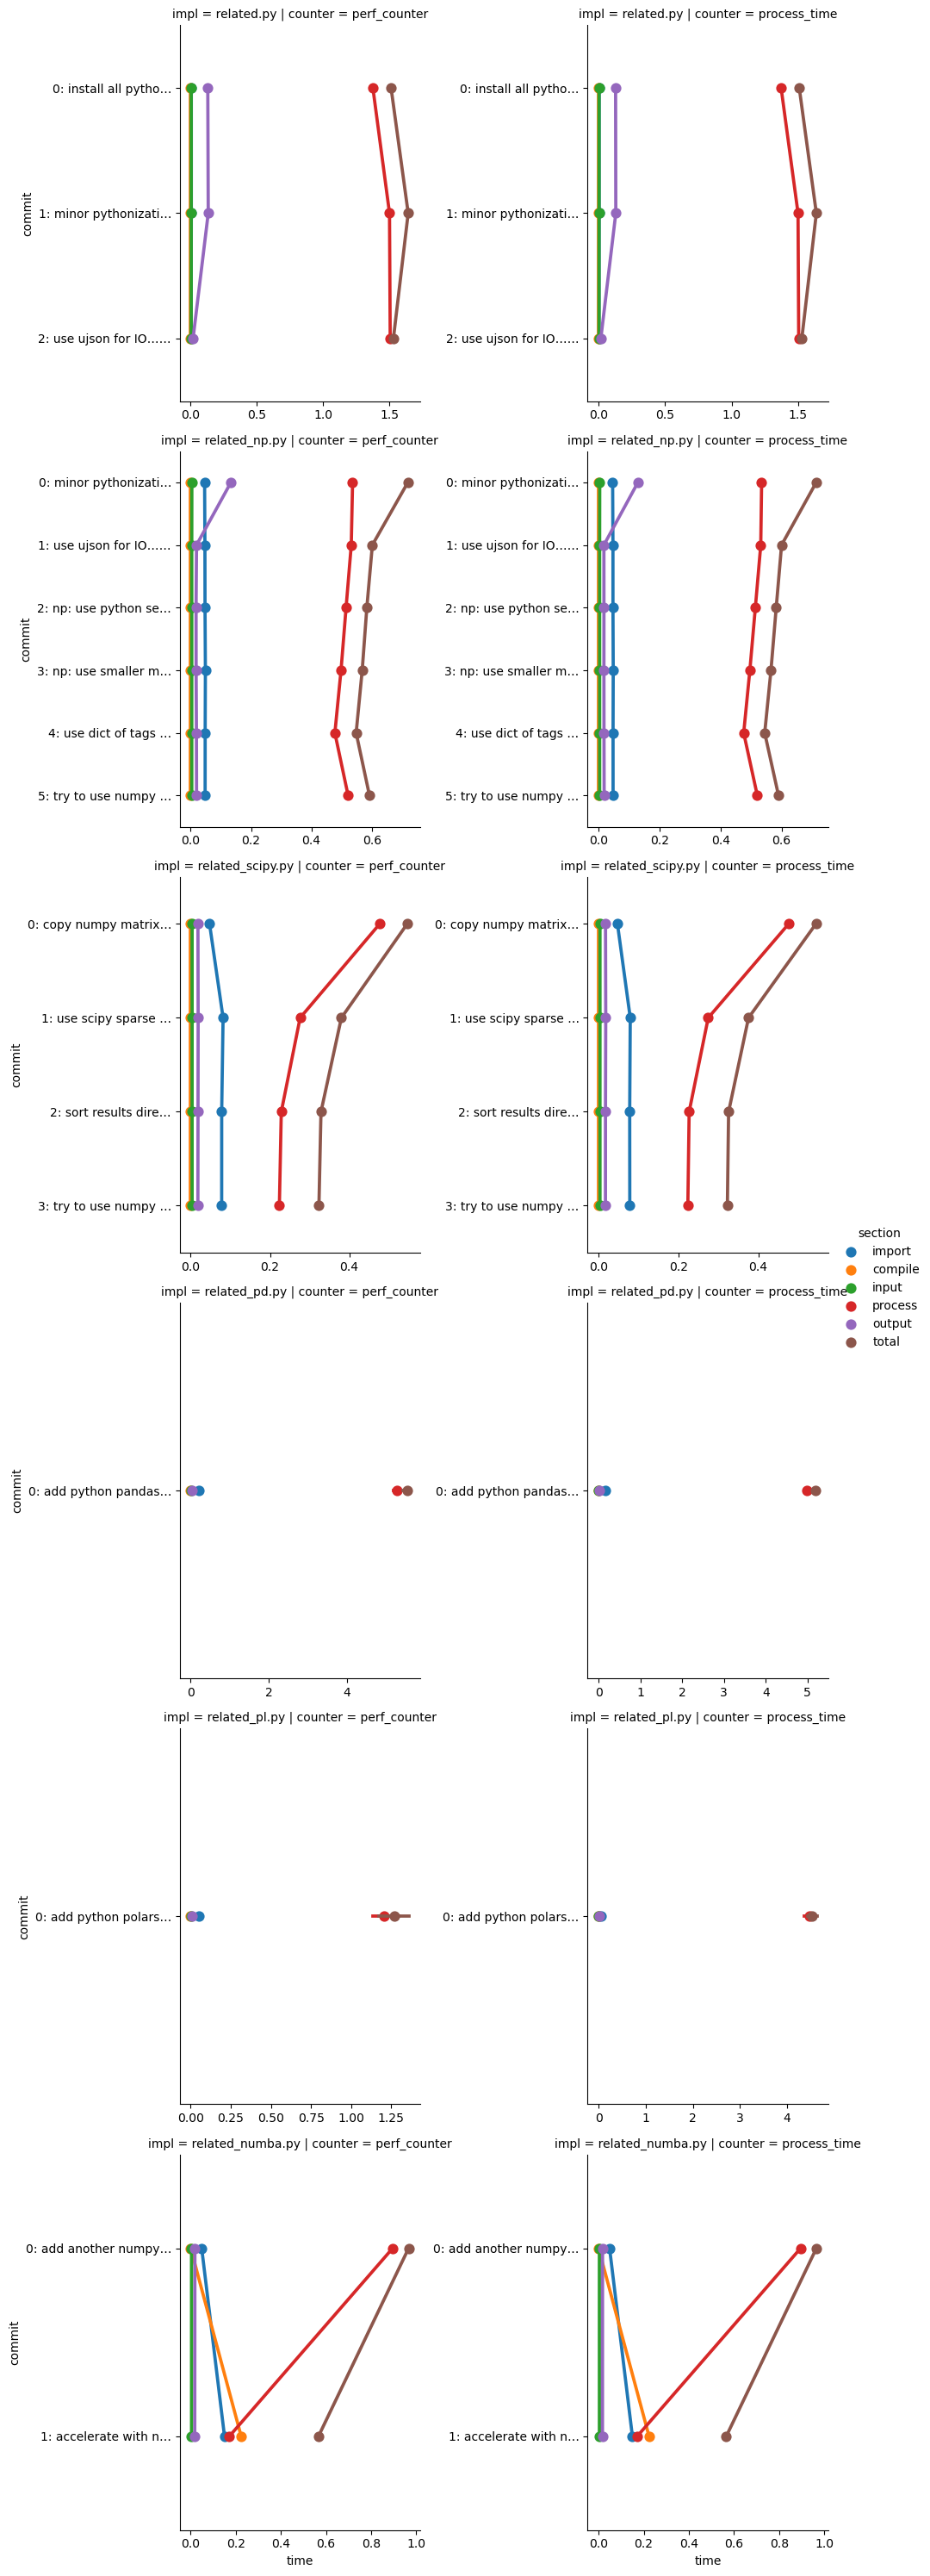

In [13]:
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

tidy = times.melt(id_vars=["impl", "commit", "counter"],
                  var_name="section", value_name="time")
grid = sns.catplot(tidy, hue="section", y="commit", x="time",
                   row="impl", col="counter", kind="point",
                  sharex=False, sharey=False)


In [14]:
def stddev(df: pd.DataFrame):
    return (1000 * df).apply(lambda c: ufloat(c.mean(), c.std()))

final_table = times.groupby(["counter", "impl", "commit"]).apply(stddev) \
    .groupby(level=[0,1]).last() \
    .reset_index() \
    .sort_values(["counter", "process"]) \
    .set_index(["counter", "impl"]) \
    .map(lambda v: f"{v:.2ufP}")
final_table

import    compile        input  \
counter      impl                                                    
perf_counter related_numba.py    149.8±2.7  223.6±2.8  3.672±0.045   
             related_scipy.py     78.1±1.1     0.00±0  3.572±0.064   
             related_np.py        47.8±2.0     0.00±0  3.631±0.058   
             related_pl.py        50.0±3.7     0.00±0  2.362±0.072   
             related.py          2.98±0.14     0.00±0  3.536±0.044   
             related_pd.py       215.0±5.1     0.00±0  7.391±0.075   
process_time related_numba.py    149.8±2.7  223.6±2.8  3.670±0.045   
             related_scipy.py     78.2±1.1     0.00±0  3.571±0.064   
             related_np.py        47.6±1.3     0.00±0  3.631±0.058   
             related.py          2.98±0.14     0.00±0  3.536±0.044   
             related_pl.py        49.1±3.6     0.00±0  2.360±0.071   
             related_pd.py     172.12±0.82     0.00±0  7.389±0.074   

                                  process      output        total  
counter      impl                                                   
perf_counter related_numba.py   171.8±1.4    17.9±1.1    566.8±4.0  
             related_scipy.py   223.6±1.2  18.12±0.65  323.43±0.79  
             related_np.py      521.6±1.6  19.39±0.70    592.4±2.9  
             related_pl.py       1206±116     9.7±1.2     1268±118  
             related.py        1504.9±4.0    17.8±1.3   1529.2±4.5  
             related_pd.py       5299±107    25.9±2.2     5548±107  
process_time related_numba.py   171.8±1.4  17.35±0.53    566.3±3.9  
             related_scipy.py   223.6±1.2  17.26±0.24  322.66±0.94  
             related_np.py      520.7±1.9  18.30±0.52    590.3±2.6  
             related.py        1504.6±4.1  17.05±0.19   1528.2±4.1  
             related_pl.py       4473±131   9.23±0.50     4534±133  
             related_pd.py        4982±77    24.4±1.3      5186±76

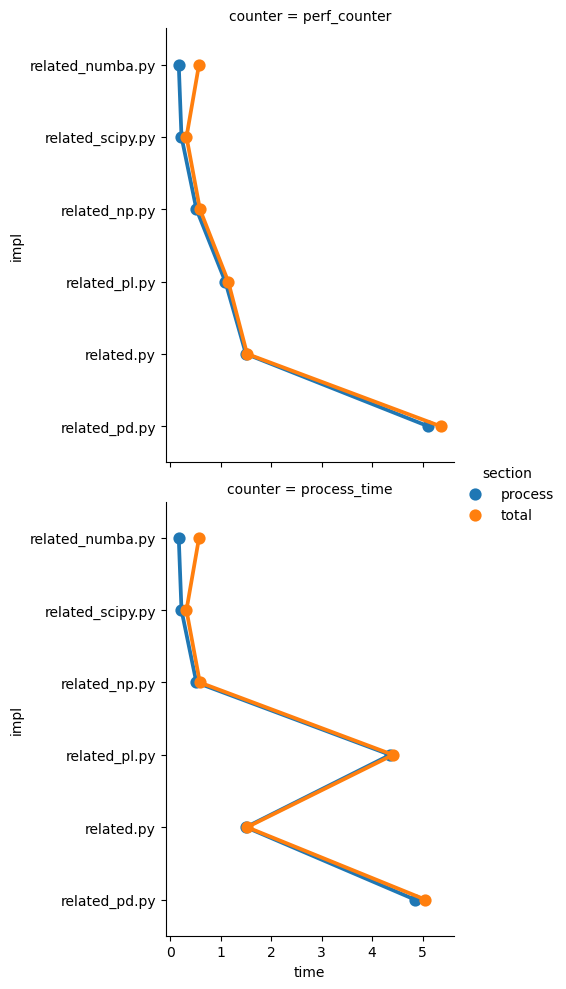

In [15]:
order = final_table.loc["perf_counter"].index
finals = times[["impl", "counter", "process", "total"]] \
    .groupby(["impl", "counter"]).last().reset_index() \
    .melt(id_vars=["impl", "counter"], var_name="section", value_name="time")
sns.catplot(finals, hue="section", y="impl", x="time",
            row="counter", kind="point",
            order=order)